In [1]:
##Mudar para essa versão do Tensorflow
%pip install tensorflow==2.15

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [2]:
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras import layers, models
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model
import cv2 as cv
import zipfile
import os



# Módulo para imprimir os gráficos de treinamento de forma dinâmica.
!pip install livelossplot

In [6]:
#from google.colab import drive
#drive.mount('/content/drive/')

##Tentativa de usar o zip da pasta do meu google drive

Mounted at /content/drive/


In [3]:
!wget /content/Train_Warwick.zip
!wget /content/Test_Warwick.zip

# Extrai o conteúdo do arquivo zip
!unzip Train_Warwick.zip
!unzip Test_Warwick.zip

/content/Train_Warwick.zip: Scheme missing.
/content/Test_Warwick.zip: Scheme missing.
Archive:  Train_Warwick.zip
   creating: Train_4cls_amostra/
   creating: Train_4cls_amostra/0/
  inflating: Train_4cls_amostra/0/46_HER2_61709.png  
  inflating: Train_4cls_amostra/0/46_HER2_64186.png  
  inflating: Train_4cls_amostra/0/13_HER2_10243.png  
  inflating: Train_4cls_amostra/0/46_HER2_58961.png  
  inflating: Train_4cls_amostra/0/46_HER2_64180.png  
  inflating: Train_4cls_amostra/0/46_HER2_55795.png  
  inflating: Train_4cls_amostra/0/18_HER2_25188.png  
  inflating: Train_4cls_amostra/0/13_HER2_11145.png  
  inflating: Train_4cls_amostra/0/13_HER2_2910.png  
  inflating: Train_4cls_amostra/0/01_HER2_4962.png  
  inflating: Train_4cls_amostra/0/18_HER2_30785.png  
  inflating: Train_4cls_amostra/0/13_HER2_11144.png  
  inflating: Train_4cls_amostra/0/01_HER2_4153.png  
  inflating: Train_4cls_amostra/0/57_HER2_6110.png  
  inflating: Train_4cls_amostra/0/01_HER2_7841.png  
  inflating:

In [4]:
def load_images_from_folder(folder):
  '''Carrega as imagens dos diretorios em uma lista com o nome do arquivo e classe'''
  images = []
  for filename in os.listdir(folder):
    img = cv.imread(os.path.join(folder,filename))
    if img is not None:
      images.append((img, filename, i))
  return images

def resize_images(images):
    '''Redimensiona as imagens para 224x224 como esperado por VGG16, ResNet50'''
    resized_images = []
    for image, filename, i in images:
      resized_image = cv.resize(image, (224, 224))
      resized_images.append((resized_image, filename, i))
    return resized_images

In [5]:
# carregando as imagens em 2 listas
# Move os dados do diretório images para images/train ou images/test:
import shutil
from collections import defaultdict
import json
from pathlib import Path
import os

os.makedirs('images/train', exist_ok=True)
os.makedirs('images/test', exist_ok=True)

temp_train_images = [[],[],[],[]]
test_images = [[],[],[],[]]

for i in range(4):
  temp_train_images[i].append(load_images_from_folder('Train_4cls_amostra/' + str(i) + '/'))

for i in range(4):
  test_images[i].append(load_images_from_folder('Test_4cl_amostra/' + str(i) + '/'))

  ''' separando em treino de validação, separando as imagens de 1 paciente por
categoria (aprox. 30 imagens por paciente) temos ~20% da base de treino
Pacientes escolhidos: 01, 14, 04 e 06'''


for i in range(4):
  for image in temp_train_images[i]:
    image = resize_images(image)
    for img, filename, cat in image:
      os.makedirs('images/test/' + str(i) + '/', exist_ok=True)
      os.makedirs('images/train/'+ str(i) + '/', exist_ok=True)
      if filename.startswith('01'):
        cv.imwrite(os.path.join('images/test/' + str(i) + '/', filename), img)
      elif filename.startswith('14'):
        cv.imwrite(os.path.join('images/test/' + str(i) + '/', filename), img)
      elif filename.startswith('04'):
        cv.imwrite(os.path.join('images/test/' + str(i) + '/', filename), img)
      elif filename.startswith('06'):
        cv.imwrite(os.path.join('images/test/' + str(i) + '/', filename), img)
      else:
        cv.imwrite(os.path.join('images/train/' + str(i) + '/', filename), img)


In [6]:
import os

class_subset = sorted(os.listdir('Train_4cls_amostra/'))
print(class_subset)

['0', '1', '2', '3']


In [7]:
# carregando as redes com transfer learning sem as camadas fuly connected

base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model_vgg16.layers:
  layer.trainable = False

for layer in base_model_resnet50.layers:
  layer.trainable = False

94765736/94765736 [==============================] - 1s 0us/step


In [8]:
# Adicionar camadas fully connected no VGG16

# camadas próprias - você pode colocar mais se quiser
# A saída da resnet será a entrada da camada criada
x = Flatten()(base_model_vgg16.output)

# camada de classificação com as 4 classes utilizadas
prediction = Dense(4, activation='softmax')(x)

# Criação do Objeto Modelo (a parte da resnet + as camadas Fully connected criadas)
model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=prediction)


In [9]:
# Adicionar camadas fully connected no resnet50

# camadas próprias - você pode colocar mais se quiser
# A saída da resnet será a entrada da camada criada
x = Flatten()(base_model_resnet50.output)

# camada de classificação com as 4 classes utilizadas
prediction = Dense(len(class_subset), activation='softmax')(x)

# Criação do Objeto Modelo (a parte da resnet + as camadas Fully connected criadas)
model_resnet50 = Model(inputs=base_model_resnet50.input, outputs=prediction)

##Data Augmentation

In [10]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
                                     rotation_range=90,
                                     brightness_range=[0.1, 0.7],
                                     width_shift_range=0.5,
                                     height_shift_range=0.5,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     validation_split=0.2,
                                     preprocessing_function=preprocess_input)

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [11]:
BATCH_SIZE = 64 # quantidade de imagens criadas em cada ciclo

traingen = train_generator.flow_from_directory('images/train',
                                               target_size=(224, 224),
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical',
                                               classes=class_subset,
                                               subset='training',
                                               shuffle=True,
                                               seed=42)

validgen = train_generator.flow_from_directory('images/train',
                                               target_size=(224, 224),
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical',
                                               classes=class_subset,
                                               subset='validation',
                                               shuffle=True,
                                               seed=42)

Found 382 images belonging to 4 classes.
Found 95 images belonging to 4 classes.


In [12]:
testgen = test_generator.flow_from_directory('images/test',
                                             target_size=(224, 224),
                                             batch_size=BATCH_SIZE,
                                             class_mode=None,
                                             classes=class_subset,
                                             shuffle=False,
                                             seed=42)

Found 116 images belonging to 4 classes.


In [13]:
import tensorflow as tf
train_noaug = tf.keras.utils.image_dataset_from_directory('images/train',
                                           labels='inferred',
                                           label_mode='categorical',
                                           subset="training",
                                           class_names=class_subset,
                                           validation_split = 0.2,
                                           image_size=(224, 224),
                                           batch_size=BATCH_SIZE,
                                           shuffle=True,
                                           seed=42)

validation_noaug = tf.keras.utils.image_dataset_from_directory('images/train',
                                           labels='inferred',
                                           label_mode='categorical',
                                           subset="validation",
                                           class_names=class_subset,
                                           validation_split = 0.2,
                                           image_size=(224, 224),
                                           batch_size=BATCH_SIZE,
                                           shuffle=True,
                                           seed=42)

Found 477 files belonging to 4 classes.
Using 382 files for training.
Found 477 files belonging to 4 classes.
Using 95 files for validation.


In [14]:
test_noaug = tf.keras.utils.image_dataset_from_directory('images/test',
                                           labels='inferred',
                                           label_mode='categorical',
                                           class_names=class_subset,
                                           image_size=(224, 224),
                                           batch_size=BATCH_SIZE,
                                           shuffle=False,
                                           seed=42)

Found 116 files belonging to 4 classes.


## Treino da VGG16

In [15]:
model_vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
model_resnet50.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

##Treinamento VGG16 com Data Augmentation

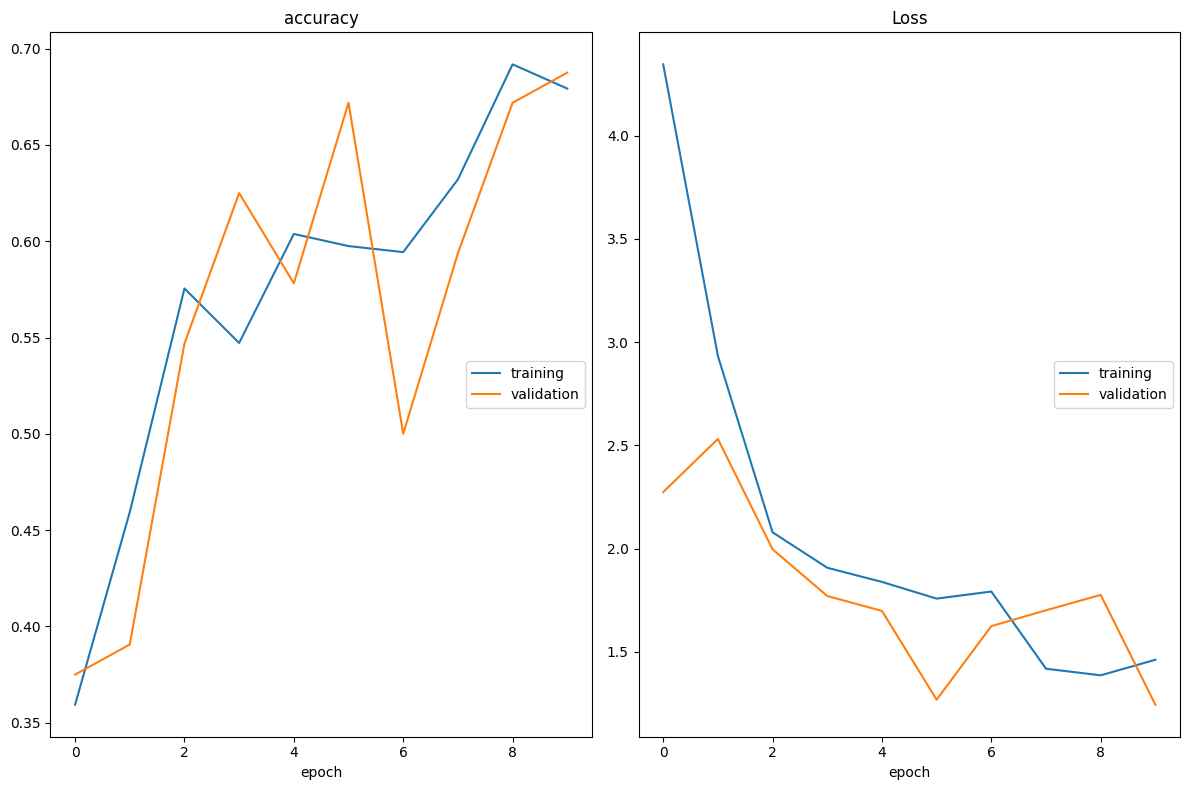

accuracy
	training         	 (min:    0.359, max:    0.692, cur:    0.679)
	validation       	 (min:    0.375, max:    0.688, cur:    0.688)
Loss
	training         	 (min:    1.386, max:    4.345, cur:    1.462)
	validation       	 (min:    1.244, max:    2.531, cur:    1.244)
CPU times: user 1min 53s, sys: 8.12 s, total: 2min 1s
Wall time: 1min 58s


In [17]:
%%time
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from livelossplot import PlotLossesKeras

steps_per_epoch = traingen.samples // BATCH_SIZE
val_steps = validgen.samples // BATCH_SIZE

n_epochs = 10

optimizer = RMSprop(learning_rate=0.0001)

model_vgg16.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Salva o modelo Keras após cada época, porém só o de melhor resultado
checkpointer = ModelCheckpoint(filepath='img_model_vgg16.weights.best.keras',
                               verbose=1,
                               save_best_only=True)

# Para o treinamento para prevenir o overfitting
# Não utilizei aqui, pois queria que rodasse todas as 30 épocas
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

# Treinamento do Modelo
history_tl = model_vgg16.fit(traingen,
                    epochs=n_epochs,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=validgen,
                    validation_steps=val_steps,
                    callbacks=[checkpointer, PlotLossesKeras()],
                    #callbacks=[early_stop, checkpointer, PlotLossesKeras()],
                    verbose=False)

#Aplicar Modelo treinado na base de teste
### Calcular Métrica de Sensibilidade,, Especificidade e F1-Score com base na matriz de confusão

2/2 [==============================] - 12s 10s/step
Acurácia Modelo VGG16 com Data Augmentation treinado 56.90%
Precisão Modelo VGG16 com Data Augmentation treinado 55.89%
F1_Score Modelo VGG16 com Data Augmentation treinado 54.46%


<Axes: >

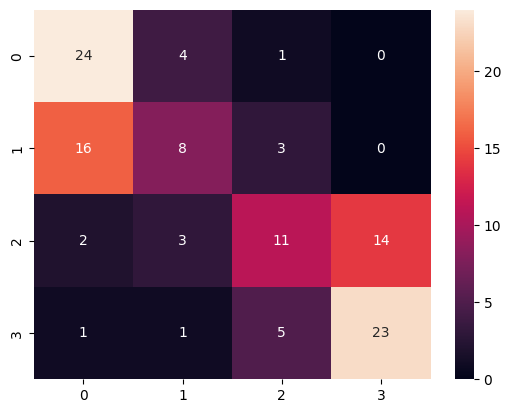

In [18]:
##Aplicar Modelo treinado na base de teste
### Calcular Métrica de Sensibilidade,, Especificidade e F1-Score com base na matriz de confusão
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

model_vgg16.load_weights('img_model_vgg16.weights.best.keras') ## Inicializa o peso com o melhor treino

true_classes = testgen.classes
class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

predictions = model_vgg16.predict(testgen)
predicted_classes = np.argmax(predictions, axis=1)


accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')
print("Acurácia Modelo VGG16 com Data Augmentation treinado {:.2f}%".format(accuracy * 100))
print("Precisão Modelo VGG16 com Data Augmentation treinado {:.2f}%".format(precision * 100))
print("F1_Score Modelo VGG16 com Data Augmentation treinado {:.2f}%".format(f1 * 100))

# Get the names of the ten classes
class_names = testgen.class_indices.keys()

#TODO: Imprimir Matriz de confusão
plot  = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(plot, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)

##Treino do modelo com dados sem Data Augmentation

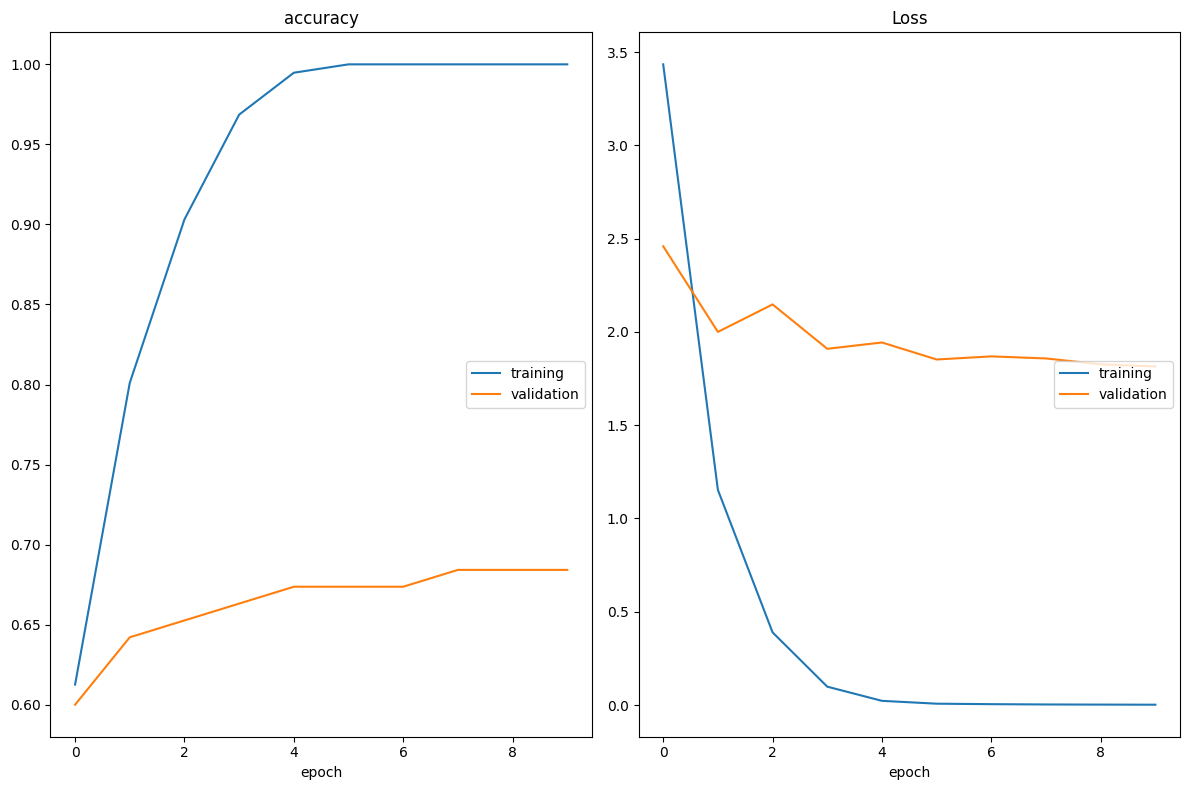

accuracy
	training         	 (min:    0.613, max:    1.000, cur:    1.000)
	validation       	 (min:    0.600, max:    0.684, cur:    0.684)
Loss
	training         	 (min:    0.002, max:    3.435, cur:    0.002)
	validation       	 (min:    1.815, max:    2.459, cur:    1.815)
CPU times: user 26.9 s, sys: 6.57 s, total: 33.5 s
Wall time: 56.8 s


In [19]:
%%time
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from livelossplot import PlotLossesKeras

#steps_per_epoch = 32 // BATCH_SIZE
#val_steps = 32 // BATCH_SIZE

n_epochs = 10

optimizer = RMSprop(learning_rate=0.0001)

model_vgg16.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Salva o modelo Keras após cada época, porém só o de melhor resultado
checkpointer = ModelCheckpoint(filepath='img_model_vgg16_noaug.weights.best.keras',
                               verbose=1,
                               save_best_only=True)

# Para o treinamento para prevenir o overfitting
# Não utilizei aqui, pois queria que rodasse todas as 30 épocas
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

# Treinamento do Modelo
history_tl = model_vgg16.fit(train_noaug,
                    epochs=n_epochs,
                    #steps_per_epoch=steps_per_epoch,
                    validation_data=validation_noaug,
                    #validation_steps=val_steps,
                    callbacks=[checkpointer, PlotLossesKeras()],
                    #callbacks=[early_stop, checkpointer, PlotLossesKeras()],
                    verbose=False)

#Aplicar Modelo treinado na base de teste
### Calcular Métrica de Sensibilidade,, Especificidade e F1-Score com base na matriz de confusão

2/2 [==============================] - 1s 477ms/step
Acurácia Modelo VGG16 sem Data Augmentation treinado 56.90%
Precisão Modelo VGG16 sem Data Augmentation treinado 59.38%
F1_Score Modelo VGG16 sem Data Augmentation treinado 55.64%


<Axes: >

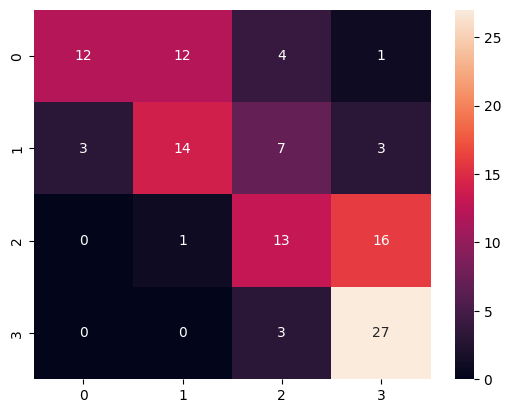

In [21]:
##Aplicar Modelo treinado na base de teste
### Calcular Métrica de Sensibilidade,, Especificidade e F1-Score com base na matriz de confusão

##Aplicar Modelo treinado na base de teste
### Calcular Métrica de Sensibilidade,, Especificidade e F1-Score com base na matriz de confusão
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

model_vgg16.load_weights('img_model_vgg16_noaug.weights.best.keras') ## Inicializa o peso com o melhor treino

true_classes = testgen.classes
class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

predictions = model_vgg16.predict(testgen)
predicted_classes = np.argmax(predictions, axis=1)


accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')
print("Acurácia Modelo VGG16 sem Data Augmentation treinado {:.2f}%".format(accuracy * 100))
print("Precisão Modelo VGG16 sem Data Augmentation treinado {:.2f}%".format(precision * 100))
print("F1_Score Modelo VGG16 sem Data Augmentation treinado {:.2f}%".format(f1 * 100))

# Get the names of the ten classes
class_names = testgen.class_indices.keys()

#TODO: Imprimir Matriz de confusão
plot  = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(plot, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)

##Treino do Resnet50 com Data Augmentation

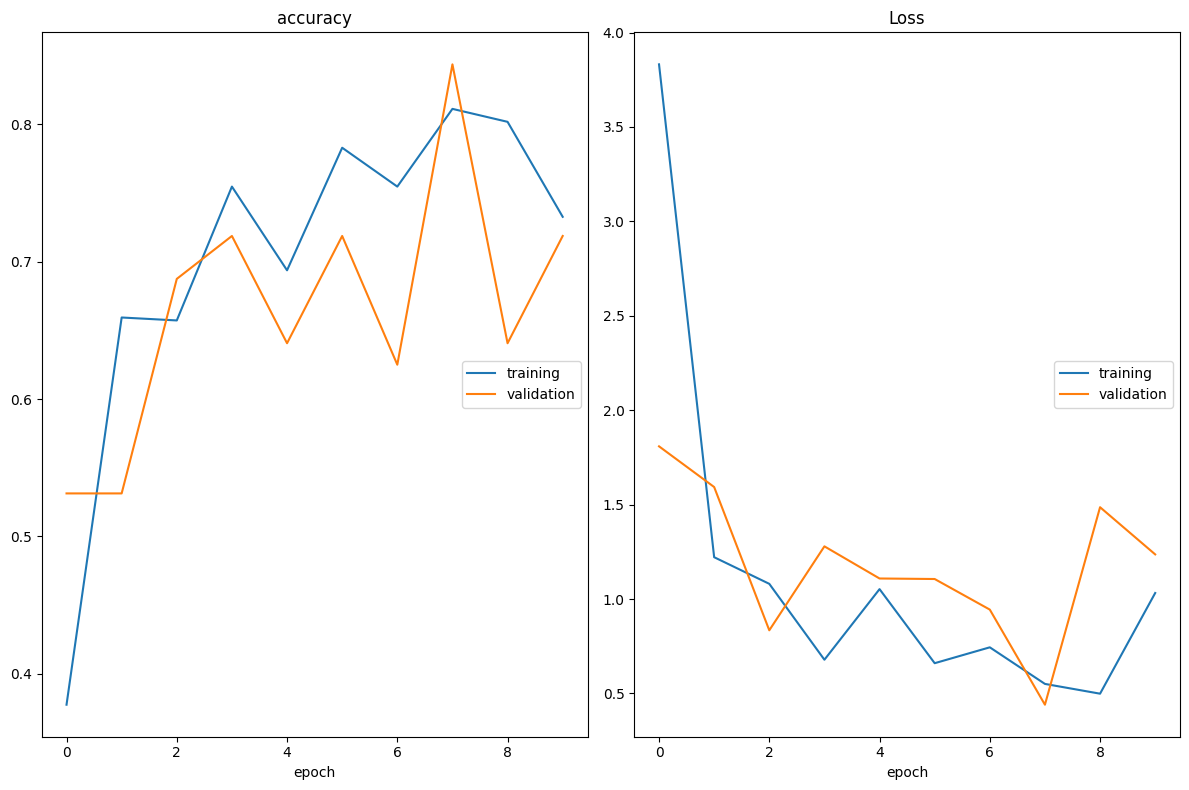

accuracy
	training         	 (min:    0.377, max:    0.811, cur:    0.733)
	validation       	 (min:    0.531, max:    0.844, cur:    0.719)
Loss
	training         	 (min:    0.499, max:    3.832, cur:    1.032)
	validation       	 (min:    0.440, max:    1.809, cur:    1.237)
CPU times: user 1min 49s, sys: 7.1 s, total: 1min 56s
Wall time: 2min 31s


In [22]:
%%time
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from livelossplot import PlotLossesKeras

steps_per_epoch = traingen.samples // BATCH_SIZE
val_steps = validgen.samples // BATCH_SIZE

n_epochs = 10

optimizer = RMSprop(learning_rate=0.0001)

model_resnet50.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Salva o modelo Keras após cada época, porém só o de melhor resultado
checkpointer = ModelCheckpoint(filepath='img_model_resnet50.weights.best.keras',
                               verbose=1,
                               save_best_only=True)

# Para o treinamento para prevenir o overfitting
# Não utilizei aqui, pois queria que rodasse todas as 30 épocas
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

# Treinamento do Modelo
history_tl = model_resnet50.fit(traingen,
                    epochs=n_epochs,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=validgen,
                    validation_steps=val_steps,
                    callbacks=[checkpointer, PlotLossesKeras()],
                    #callbacks=[early_stop, checkpointer, PlotLossesKeras()],
                    verbose=False)

#Aplicar Modelo treinado na base de teste
### Calcular Métrica de Sensibilidade,, Especificidade e F1-Score com base na matriz de confusão

2/2 [==============================] - 5s 3s/step
Acurácia Modelo Resnet50 com Data Augmentation treinado 56.90%
Precisão Modelo Resnet50 com  Data Augmentation treinado 67.00%
F1_Score Modelo Resnet50 com  Data Augmentation treinado 46.70%


<Axes: >

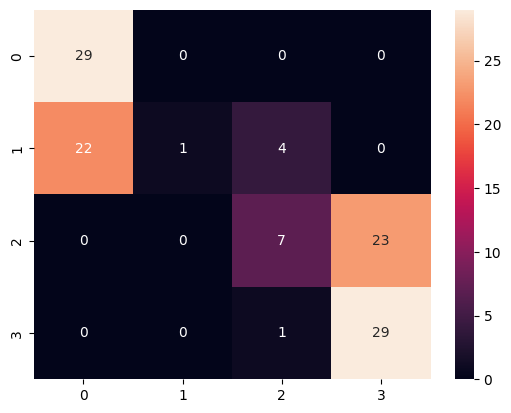

In [24]:
##Aplicar Modelo treinado na base de teste
### Calcular Métrica de Sensibilidade,, Especificidade e F1-Score com base na matriz de confusão
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

model_resnet50.load_weights('img_model_resnet50.weights.best.keras') ## Inicializa o peso com o melhor treino

true_classes = testgen.classes
class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

predictions = model_resnet50.predict(testgen)
predicted_classes = np.argmax(predictions, axis=1)


accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')
print("Acurácia Modelo Resnet50 com Data Augmentation treinado {:.2f}%".format(accuracy * 100))
print("Precisão Modelo Resnet50 com  Data Augmentation treinado {:.2f}%".format(precision * 100))
print("F1_Score Modelo Resnet50 com  Data Augmentation treinado {:.2f}%".format(f1 * 100))

# Get the names of the ten classes
class_names = testgen.class_indices.keys()

#TODO: Imprimir Matriz de confusão
plot  = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(plot, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)

##Treino do Modelo sem Data Augmentation

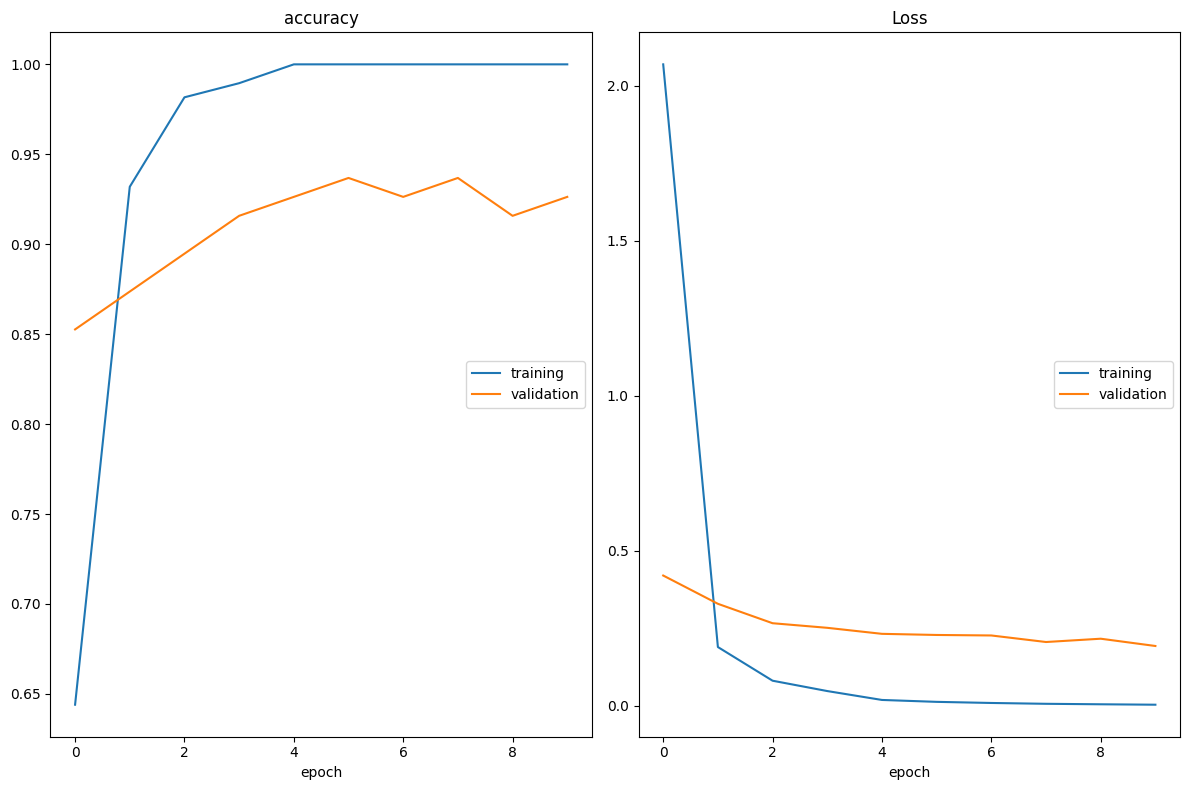

accuracy
	training         	 (min:    0.644, max:    1.000, cur:    1.000)
	validation       	 (min:    0.853, max:    0.937, cur:    0.926)
Loss
	training         	 (min:    0.004, max:    2.068, cur:    0.004)
	validation       	 (min:    0.193, max:    0.420, cur:    0.193)
CPU times: user 31.6 s, sys: 6.29 s, total: 37.9 s
Wall time: 48 s


In [25]:
%%time
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from livelossplot import PlotLossesKeras

#steps_per_epoch = traingen.samples // BATCH_SIZE
#val_steps = validgen.samples // BATCH_SIZE

n_epochs = 10

optimizer = RMSprop(learning_rate=0.0001)

model_resnet50.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Salva o modelo Keras após cada época, porém só o de melhor resultado
checkpointer = ModelCheckpoint(filepath='img_model_resnet50_noaug.weights.best.keras',
                               verbose=1,
                               save_best_only=True)

# Para o treinamento para prevenir o overfitting
# Não utilizei aqui, pois queria que rodasse todas as 30 épocas
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

# Treinamento do Modelo
history_tl = model_resnet50.fit(train_noaug,
                    epochs=n_epochs,
                    #steps_per_epoch=steps_per_epoch,
                    validation_data=validation_noaug,
                    #validation_steps=val_steps,
                    callbacks=[checkpointer, PlotLossesKeras()],
                    #callbacks=[early_stop, checkpointer, PlotLossesKeras()],
                    verbose=False)

#Aplicar Modelo treinado na base de teste
### Calcular Métrica de Sensibilidade,, Especificidade e F1-Score com base na matriz de confusão

2/2 [==============================] - 1s 226ms/step
Acurácia Modelo Resnet50 sem Data Augmentation treinado 63.79%
Precisão Modelo Resnet50 sem Data Augmentation treinado 64.24%
F1_Score Modelo Resnet50 sem Data Augmentation treinado 58.01%


<Axes: >

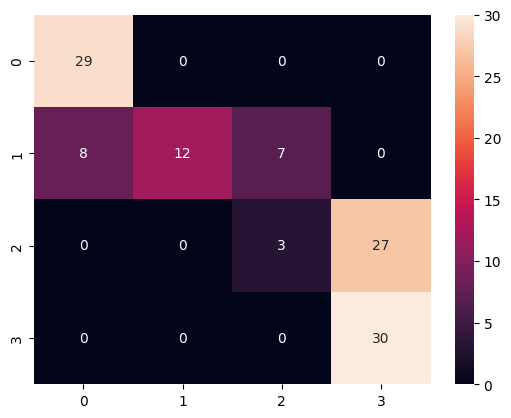

In [26]:
##Aplicar Modelo treinado na base de teste
### Calcular Métrica de Sensibilidade,, Especificidade e F1-Score com base na matriz de confusão
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

model_resnet50.load_weights('img_model_resnet50_noaug.weights.best.keras') ## Inicializa o peso com o melhor treino

true_classes = testgen.classes
class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

predictions = model_resnet50.predict(testgen)
predicted_classes = np.argmax(predictions, axis=1)


accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')
print("Acurácia Modelo Resnet50 sem Data Augmentation treinado {:.2f}%".format(accuracy * 100))
print("Precisão Modelo Resnet50 sem Data Augmentation treinado {:.2f}%".format(precision * 100))
print("F1_Score Modelo Resnet50 sem Data Augmentation treinado {:.2f}%".format(f1 * 100))

# Get the names of the ten classes
class_names = testgen.class_indices.keys()

#TODO: Imprimir Matriz de confusão
plot  = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(plot, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)